<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
response=requests.get(url)

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(response.text, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [19]:
#your code goes here
table=soup.find('table')

def data_fetch(table):
    popular_language = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        language = cols[1].getText()
        salary = cols[3].getText()
#        print(("{}---->{}").format(language,salary))
        popular_language.append([language,salary])
#    popular_language.remove(['Language', 'Average Annual Salary'])
    return popular_language

popular_language=data_fetch(table)
popular_language


[['Language', 'Average Annual Salary'],
 ['Python', '$114,383'],
 ['Java', '$101,013'],
 ['R', '$92,037'],
 ['Javascript', '$110,981'],
 ['Swift', '$130,801'],
 ['C++', '$113,865'],
 ['C#', '$88,726'],
 ['PHP', '$84,727'],
 ['SQL', '$84,793'],
 ['Go', '$94,082']]

Save the scrapped data into a file named *popular-languages.csv*

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.


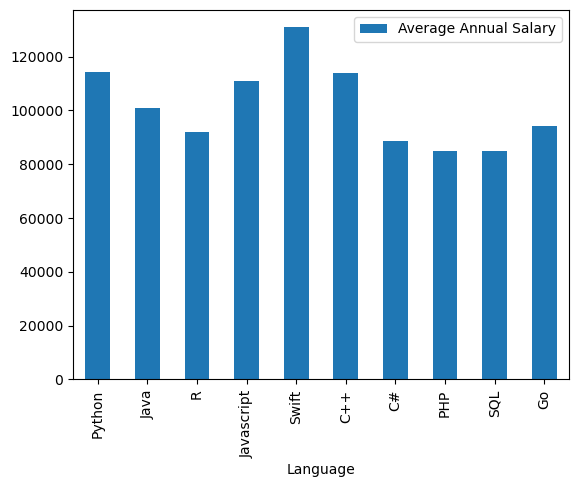

In [37]:
# your code goes here
import csv
with open('popular-languages.csv','w',newline='') as file:
    csvwriter = csv.writer(file)
    for row in popular_language:
        csvwriter.writerow(row)
        
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('popular-languages.csv')
#df.head(50)
#print(df)
df['Average Annual Salary']=df['Average Annual Salary'].str.replace('$','').str.replace(',','').astype(int)
#df.sort_values('Average Annual Salary', acending=False)
df.plot(x='Language', y='Average Annual Salary', kind='bar')
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
